# K近邻分类器


- 工作机制：

    - 给定一个测试样本

    - 计算它到训练样本的距离

    - 取离测试样本最近的k个训练样本

    - “投票法”选出在这k个样本中出现最多的类别，就是预测的结果
    

- 距离衡量的标准

    距离衡量的标准有很多，常见的有：Lp距离、切比雪夫距离、马氏距离、巴氏距离、余弦值等。这里用欧氏距离作为距离的衡量标准。
    在欧几里得空间中，点 x = (x1,...,xn) 和 y = (y1,...,yn) 之间的欧氏距离为
    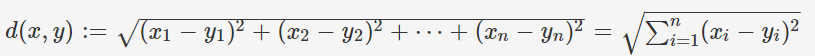



- 优点

    - 简单好用，容易理解，精度高，理论成熟，既可以用来做分类也可以用来做回归；
    - 可用于数值型数据和离散型数据；
    - 训练时间复杂度为O(n)；无数据输入假定；
    - 对异常值不敏感。
    
    
- 缺点

    - 计算复杂性高；空间复杂性高；
    
    - 样本不平衡问题（即有些类别的样本数量很多，而其它样本的数量很少）；
    
    - 一般数值很大的时候不用这个，计算量太大。但是单个样本又不能太少，否则容易发生误分。
    
    - 最大的缺点是无法给出数据的内在含义。
   
补充一点：由于它属于懒惰学习，因此需要大量的空间来存储训练实例，在预测时它还需要与已知所有实例进行比较，增大了计算量。

In [1]:
# 导入基本库
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'png'

In [18]:
# K近邻实现
class KNN():
    def __init__(self):
        # 存储距离矩阵
        self.x_train = []
        self.y_train = []

    # 计算距离矩阵
    def euclideanDistance(self, train_X, test_X):
        train_X = np.array(train_X)
        test_X = np.array(test_X)
        
        num_test = test_X.shape[0]
        num_train = train_X.shape[0]
        
        sum_train = np.power(train_X, 2)
        sum_train = sum_train.sum(axis=1)
        sum_train = sum_train * np.ones((num_test, num_train))
        
        sum_test = np.power(test_X, 2)
        sum_test = sum_test.sum(axis=1)
        sum_test = sum_test * np.ones((1, sum_train.shape[0]))
        
        sum_test = sum_test.T
        sum = sum_train + sum_test - 2 * np.dot(test_X, train_X.T)
        dists = np.sqrt(sum)
        return dists

    def fit(self,x_train,y_train):
        self.x_train = np.array(x_train)
        self.y_train = np.array(y_train)
        
    def predict(self,x_test,k=1):
        # 计算距离
        dists = self.euclideanDistance(self.x_train,x_test)
        
        x_test = np.array(x_test)
        
        num_test = dists.shape[0]
        y_pred = []
        for i in range(num_test):
            # 排序
            index = np.argsort(dists[i])
            # 找到前k个距离最近点
            index = index[:k]
            closest_y = self.y_train[index]
            # 投票决定属于哪个类别
            name, _ = Counter(closest_y).most_common(1)[0]
            y_pred.append(name)
        return y_pred

# 数据预处理

In [5]:
colume_names = ['','gender','height','weight','size']
df= pd.read_excel('data/gender.xlsx',index_col=0,names=colume_names)
df.head(5)

,gender,height,weight,size
,,,,
1,女,163.0,62.0,36.0
2,女,158.0,42.0,36.0
3,男,168.0,67.0,42.0
4,男,180.0,67.0,41.0
5,男,180.0,75.0,46.0


In [6]:
df.shape

(571, 4)

In [7]:
# 性别数据转换
df.replace('男',1,inplace=True)
df.replace('女',2,inplace=True)
df.head(5)

,gender,height,weight,size
,,,,
1,2,163.0,62.0,36.0
2,2,158.0,42.0,36.0
3,1,168.0,67.0,42.0
4,1,180.0,67.0,41.0
5,1,180.0,75.0,46.0


In [11]:
# 数据提取
data = df[['height','weight','size','gender']].copy()
data.columns = ['feature1', 'feature2', 'feature3','category']
data.head(5)

,feature1,feature2,feature3,category
,,,,
1,163.0,62.0,36.0,2
2,158.0,42.0,36.0,2
3,168.0,67.0,42.0,1
4,180.0,67.0,41.0,1
5,180.0,75.0,46.0,1


In [13]:
X = data.iloc[:,0:3] # 特征
Y = data.iloc[:,3] # 标签

In [14]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [34]:
# 测试不同 k 的平均错误率情况
def K_KNN_Test(k_knn):   
    k = 10
    kf = KFold(n_splits=k,shuffle=True)
    accuracies = []
    i = 0

    for train_index, test_index in kf.split(data):  # 拆分

        x_train, x_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

        model = KNN()  # 模型原型 选择
        model.fit(x_train, y_train)  # 训练
        y_predict = model.predict(x_test,k_knn)  # 预测

        accuracy = accuracy_score(y_pred=y_predict, y_true=y_test)
        accuracies.append(accuracy)
        i += 1

    # 平均错误率
    print('k = {0} KNN average error rate:{1}'.format(k_knn,np.mean(accuracies)))

In [42]:
for i in [1,3,5,7,9,11,13,15,17,19,21]:
    K_KNN_Test(i)

k = 1 KNN average error rate:0.9912280701754386
k = 3 KNN average error rate:0.9562310949788264
k = 5 KNN average error rate:0.9369630973986691
k = 7 KNN average error rate:0.9315789473684211
k = 9 KNN average error rate:0.9335148215366
k = 11 KNN average error rate:0.936993345432547
k = 13 KNN average error rate:0.935178463399879
k = 15 KNN average error rate:0.9316696914700543
k = 17 KNN average error rate:0.9264065335753177
k = 19 KNN average error rate:0.9247126436781608
k = 21 KNN average error rate:0.9264367816091955
